In [1]:
# Step 1: Import necessary libraries
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Step 2: Load the IMDB dataset
data = pd.read_csv("/content/imdb_top_1000.csv")

In [ ]:
# We keep only the top 10,000 most frequently occurring words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 3: Pad the sequences so they are all the same length
# Reviews can have different lengths; we make them uniform
maxlen = 500  # Max length of review
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Step 4: Build the model
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid = binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6331 - loss: 0.6067 - val_accuracy: 0.8688 - val_loss: 0.3078
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9300 - loss: 0.1883 - val_accuracy: 0.8556 - val_loss: 0.3338
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9868 - loss: 0.0595 - val_accuracy: 0.8684 - val_loss: 0.3602
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9986 - loss: 0.0130 - val_accuracy: 0.8632 - val_loss: 0.4155
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8630 - val_loss: 0.4472


In [ ]:
# Step 7: Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8600 - loss: 0.4389

✅ Test Accuracy: 0.86


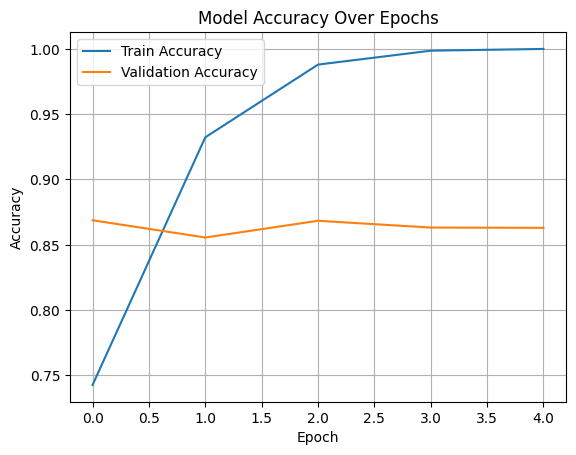

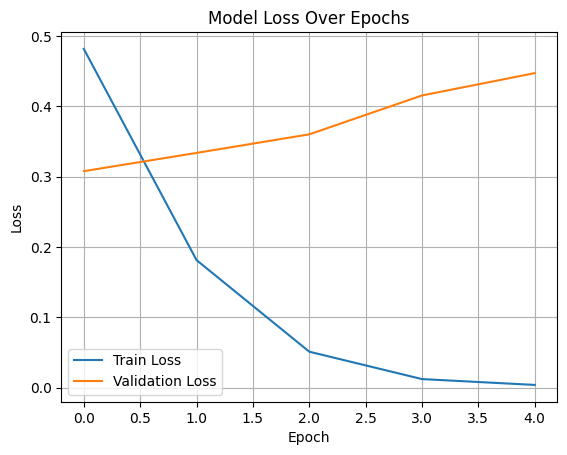

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
